# Lab N
### Morphology

Skimage morphology operators' documentation:
https://scikit-image.org/docs/dev/api/skimage.morphology.html

In [2]:
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle

# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

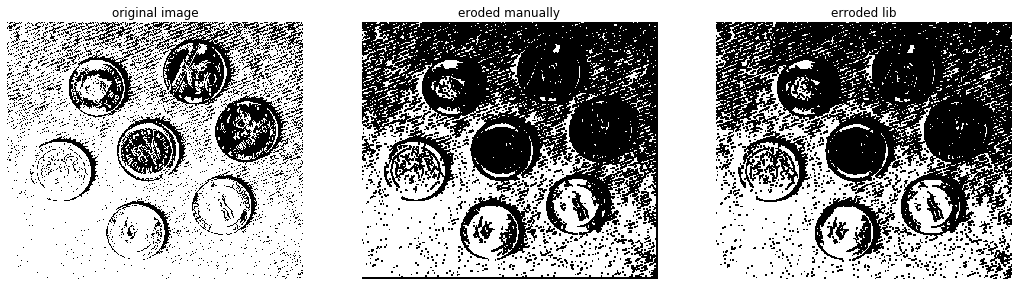

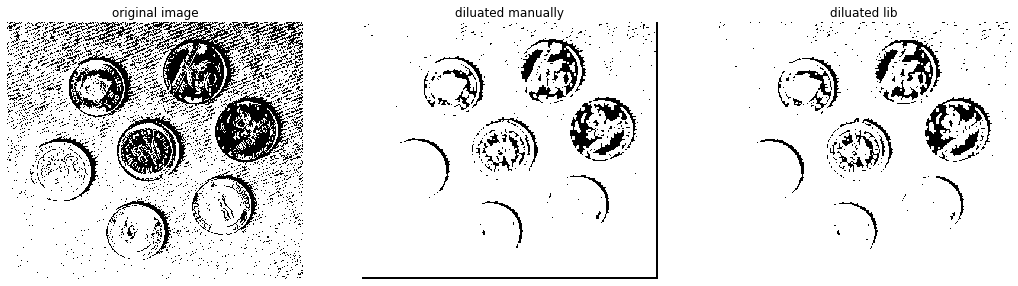

In [3]:
'''
1) Erosion / Dilation:
    - Load "coins.jpg" from the img folder
    - Convert the image to binary
    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the binary image
    - Use Skimage's "binary_erosion" & "binary_dilation" & show the results
'''
def erosion(img,structure):
    eroded=np.zeros(img.shape)
    for i in range(img.shape[0]-structure.shape[0]):
        for j in range((img.shape[1])-structure.shape[1]):
            min=img[i,j];
            #get the minimunm depending on the structure
            for x in range(structure.shape[0]):
                for y in range(structure.shape[1]):
                    if(structure[x,y]==1):
                        # get the minimum here
                        temp=img[i+x,j+y];
                        if(min>temp):
                            min=temp;

            eroded[i,j]=min                    
    return eroded
def diluation(img,structure):
    eroded=np.zeros(img.shape)
    for i in range(img.shape[0]-structure.shape[0]):
        for j in range((img.shape[1])-structure.shape[1]):
            min=img[i,j];
            #get the minimunm depending on the structure
            for x in range(structure.shape[0]):
                for y in range(structure.shape[1]):
                    if(structure[x,y]==1):
                        # get the minimum here
                        temp=img[i+x,j+y];
                        if(min<temp):
                            min=temp;

            eroded[i,j]=min                    
    return eroded

img=rgb2gray(io.imread('coins.jpg'))
img[img<=0.5]=0
img[img>0.5]=1

structure=np.ones((3,3))
eroded=erosion(img,structure)
diluated=diluation(img,structure)
diluatedbin=binary_dilation(img,structure)
erodedbin=binary_erosion(img,structure)
show_images([img,eroded,erodedbin],['original image','eroded manually','erroded lib'])
show_images([img,diluated,diluatedbin],['original image','diluated manually','diluated lib'])

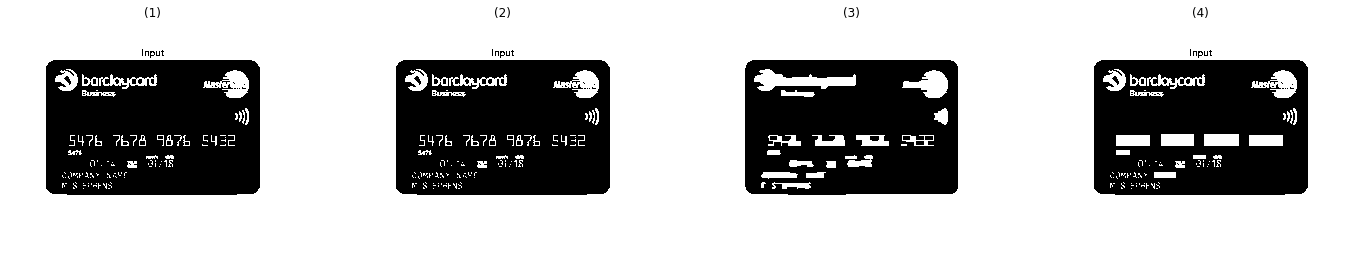

In [4]:
'''
2) Case Study: Credit Card Number Extraction
    - Load "card.jpg" from the img folder
    - Convert the image to binary by brightness thresholding maintaining the card number details for extraction
    - Use your erosion/dilation functions, or Skimage's functions only if you didn't implement them, to apply closing
        Note: The goal of this step is to join the card number into 4 sets of connected pixels
    - Use Skimage's "find_contours" to get the bounding boxes for the credit card's numbers by filtering on aspect ratio (between 2.5 & 3.5)
        Note: When using "find_contours(img, 0.8)" the o/p is a list of contours each having:
                - contour[:,0] being the Y values of the contour perimeter points
                - contour[:,1] being the X values of the contour perimeter points
'''

    
    
img = rgb2gray(io.imread("img/card.jpg"))
img_gray = img
img[img <= 0.55] = 0
img[img > 0.55] = 1
f = np.ones((3,12))
eroded = binary_dilation(img, f)
closing = binary_erosion(eroded, f)
contours = find_contours(closing, 0.8)
bounding_boxes = []
for cont in contours:
    Xmin = np.min(cont[:,1])
    Xmax = np.max(cont[:,1])
    Ymin = np.min(cont[:,0])
    Ymax = np.max(cont[:,0])
    if(((Xmax - Xmin)/(Ymax - Ymin))> 2.5 and ((Xmax - Xmin)/(Ymax - Ymin))< 3.5):
        bounding_boxes.append([Xmin, Xmax, Ymin, Ymax])

img_with_boxes = np.copy(img_gray)
#When provided with the correct format of the list of bounding_boxes, this section will set all pixels inside boxes in img_with_boxes
for box in bounding_boxes:
    [Xmin, Xmax, Ymin, Ymax] = box
    rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=img_gray.shape)
    img_with_boxes[rr.astype(int), cc.astype(int)] = 1 #set color white
show_images([img_gray, img, closing, img_with_boxes])

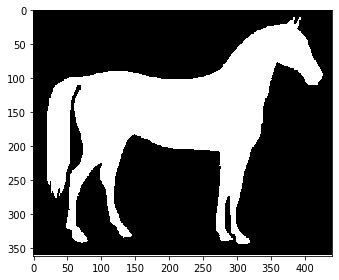

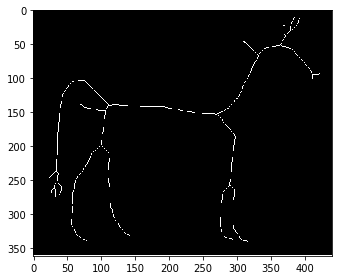

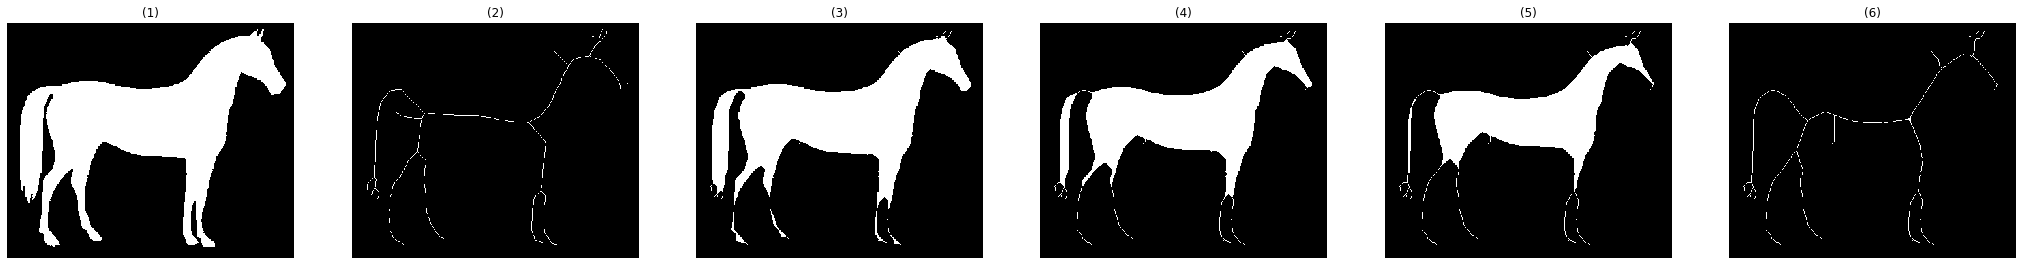

In [10]:
'''
3) Skeletonization:
    - Load "horse.jpg" from the img folder 
    - Use a binary threshold of 0.9 to remove invisible noise in the background
    - Use Skimage's "skeletonize(image)" to acquire the image's skeleton & show it
    - Use Skimage's "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it
'''
horse =rgb2gray(io.imread("img/horse.jpg")) 
horse[horse <= 0.9] = 0
horse[horse > 0.9] = 1
io.imshow(horse)
io.show()
skeleton = skeletonize(horse)
io.imshow(skeleton)
show_images([horse, skeleton, thin(horse, 5), thin(horse, 10), thin(horse, 15), thin(horse, 60)])

